In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/cardio_train.csv', sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
null_values = data.isnull().sum()
null_values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn

In [ ]:
data.loc[:, 'age'] = data['age'] / 365
data.drop('id', axis=1, inplace=True)
# Print the modified DataFrame
print(data)


             age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      50.391781       2     168    62.0    110     80            1     1   
1      55.419178       1     156    85.0    140     90            3     1   
2      51.663014       1     165    64.0    130     70            3     1   
3      48.282192       2     169    82.0    150    100            1     1   
4      47.873973       1     156    56.0    100     60            1     1   
...          ...     ...     ...     ...    ...    ...          ...   ...   
69995  52.712329       2     168    76.0    120     80            1     1   
69996  61.920548       1     158   126.0    140     90            2     2   
69997  52.235616       2     183   105.0    180     90            3     1   
69998  61.454795       1     163    72.0    135     80            1     2   
69999  56.273973       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1

In [ ]:
X= data.drop(['cardio'], axis=1)
y = data['cardio']
print(X,y)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  
0         

Data Summary:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       

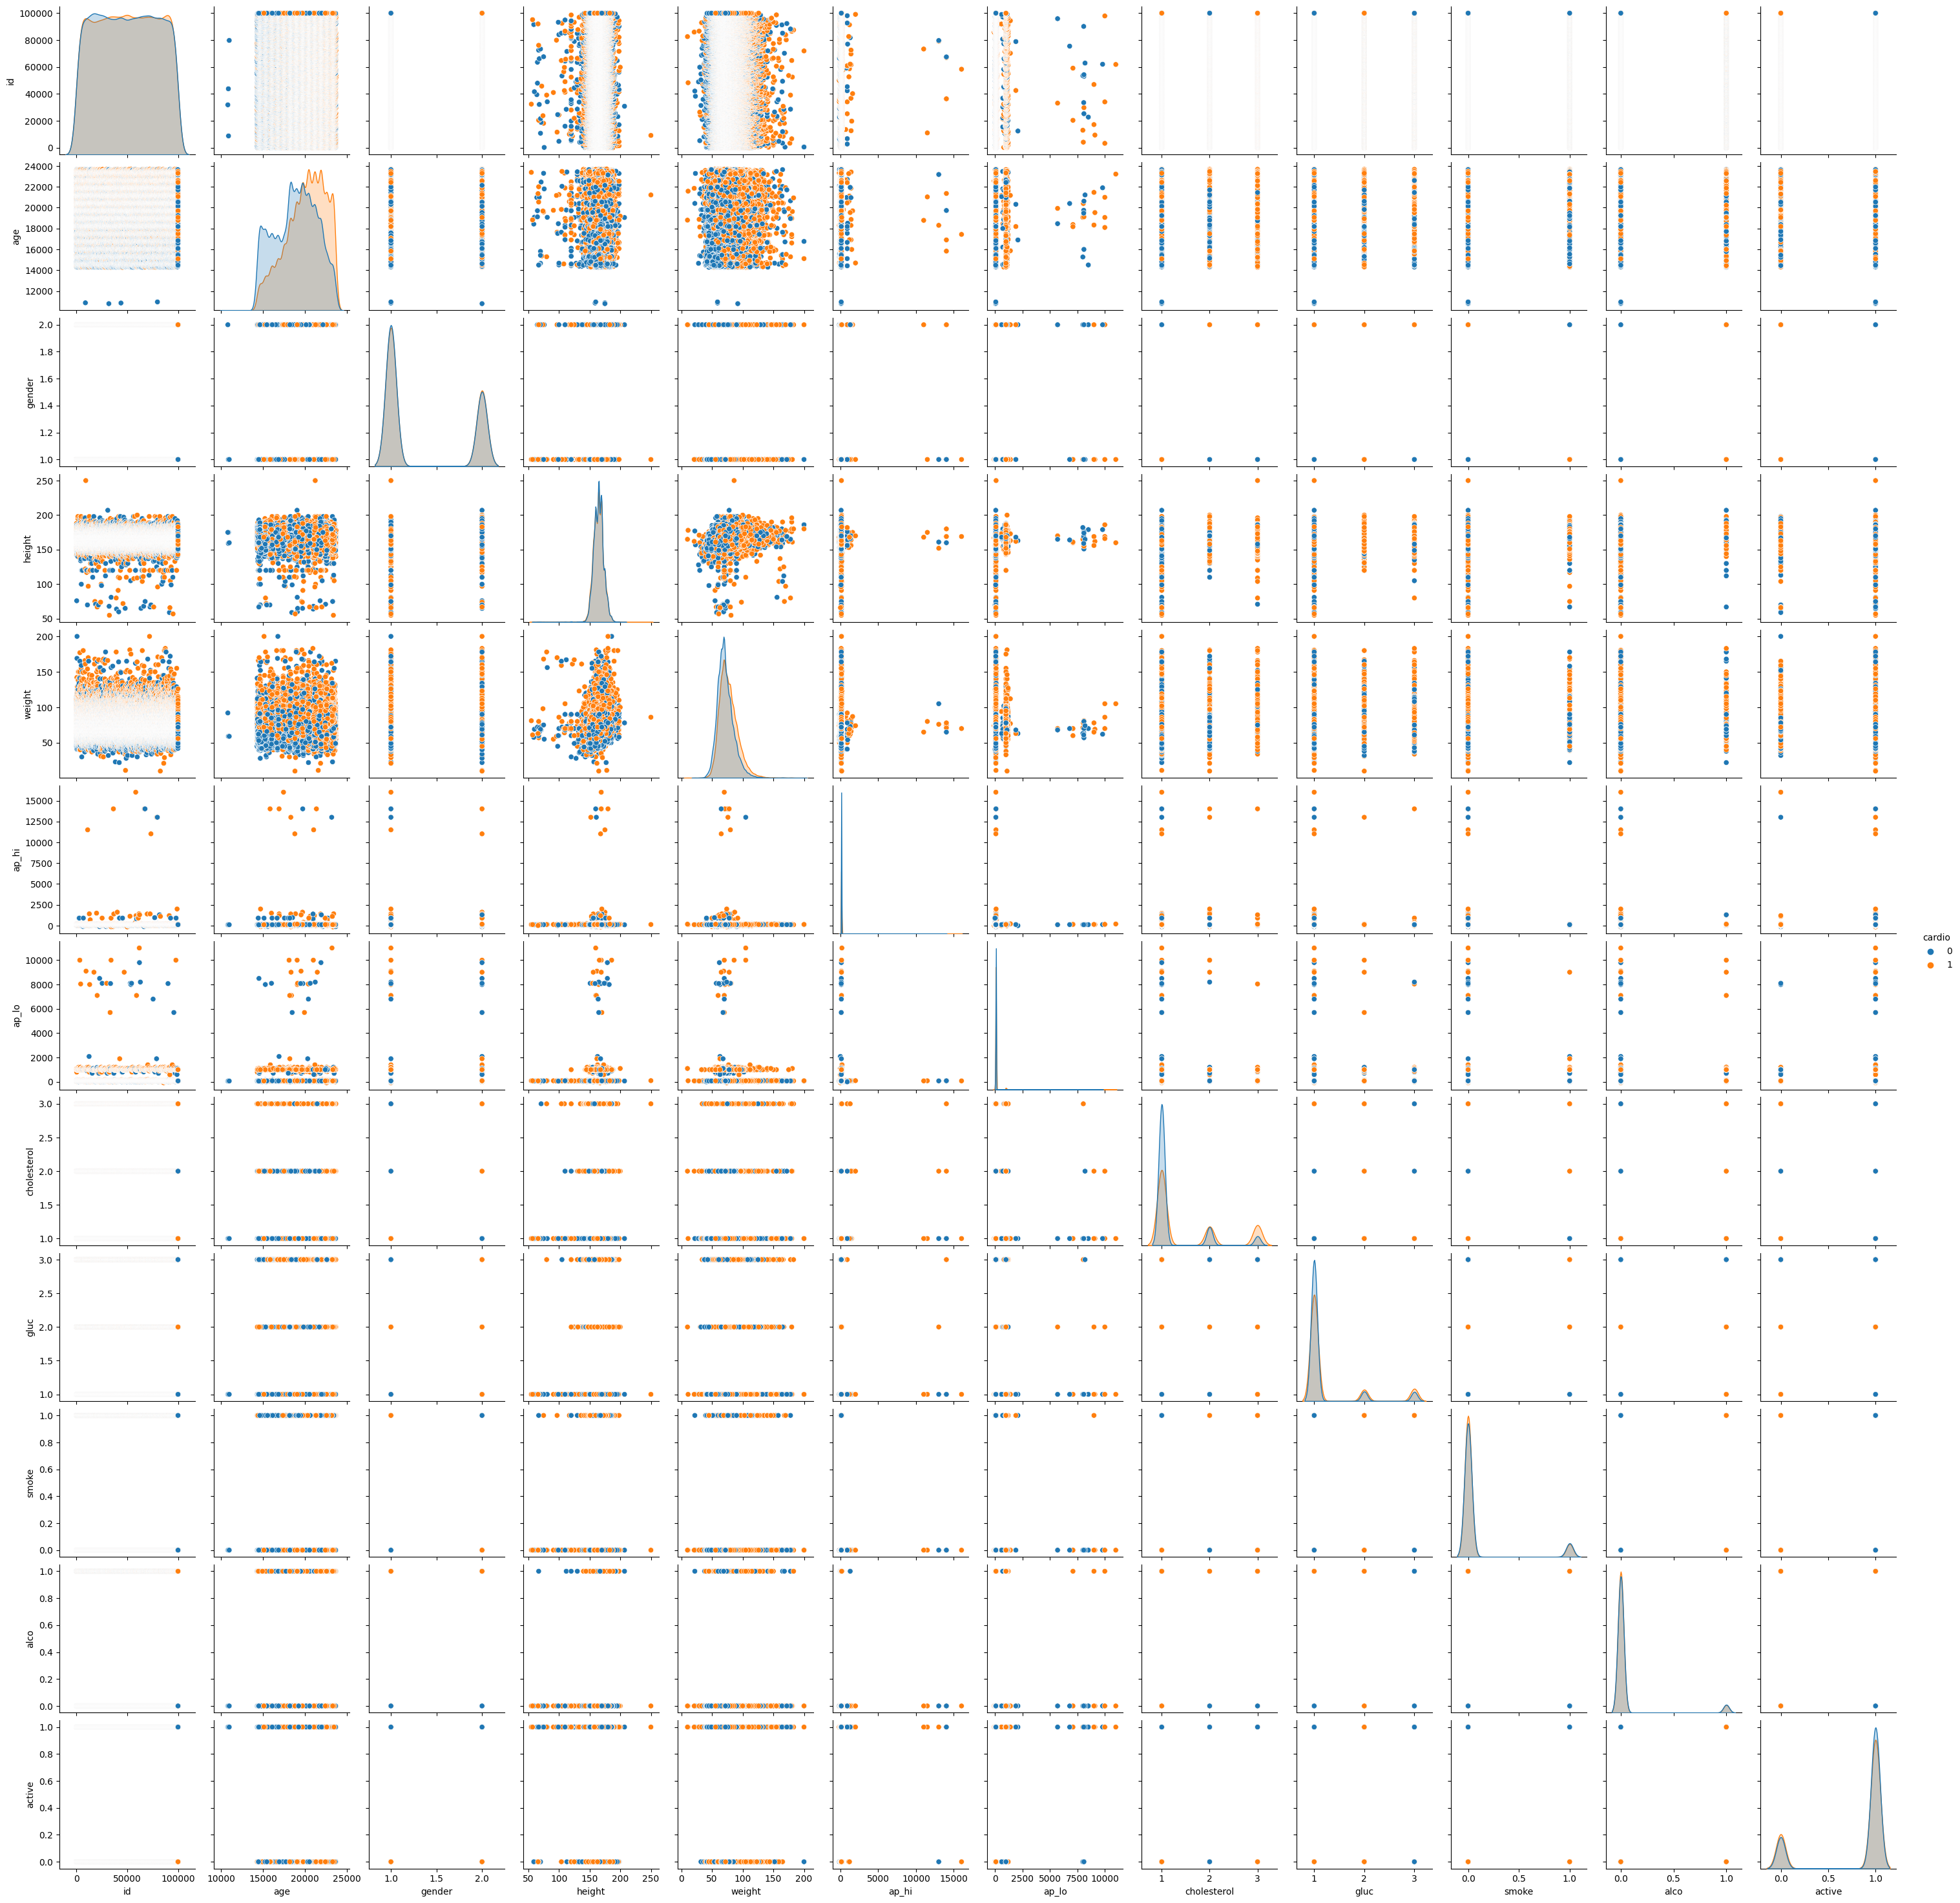

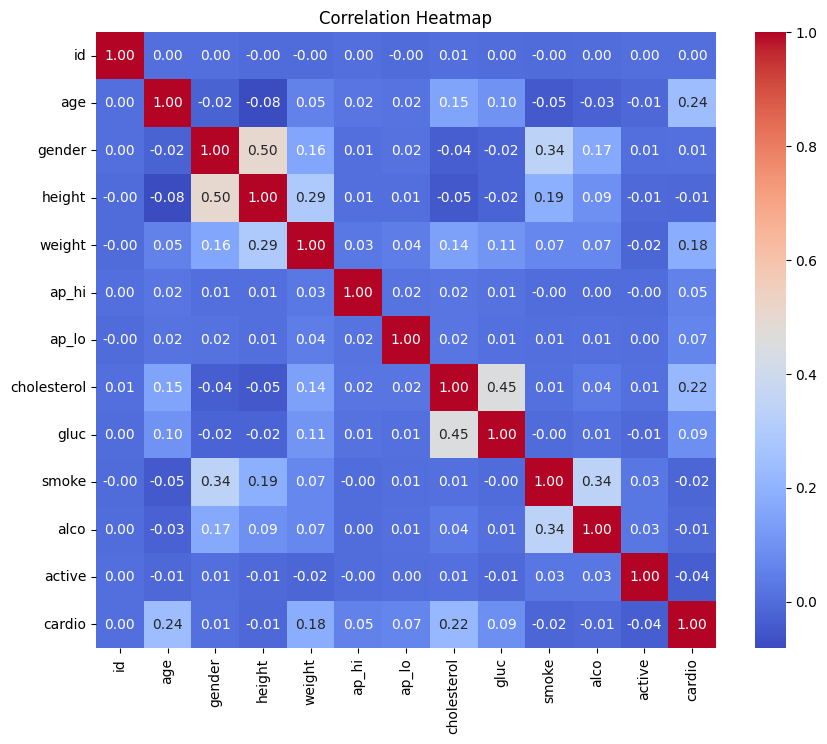

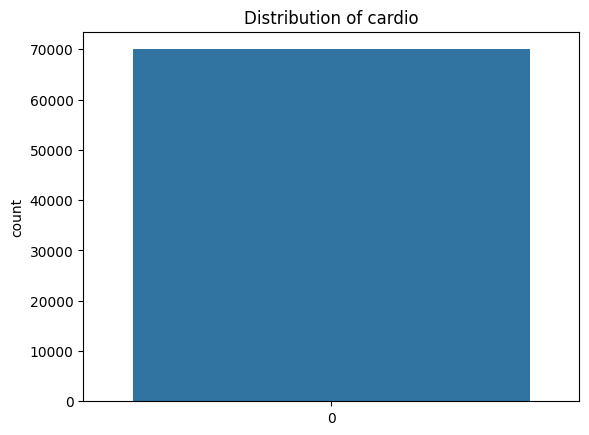

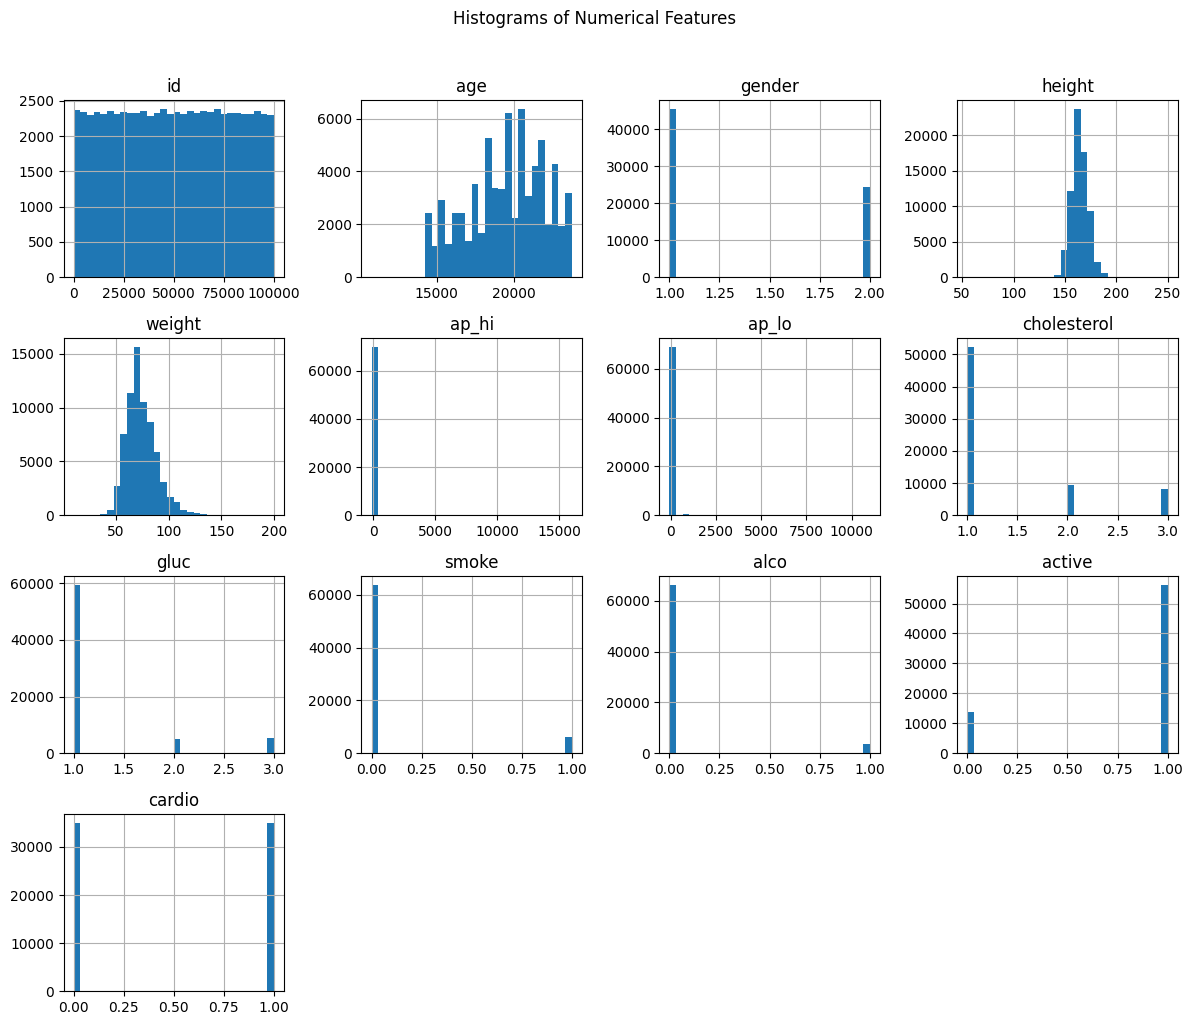

ValueError: ignored

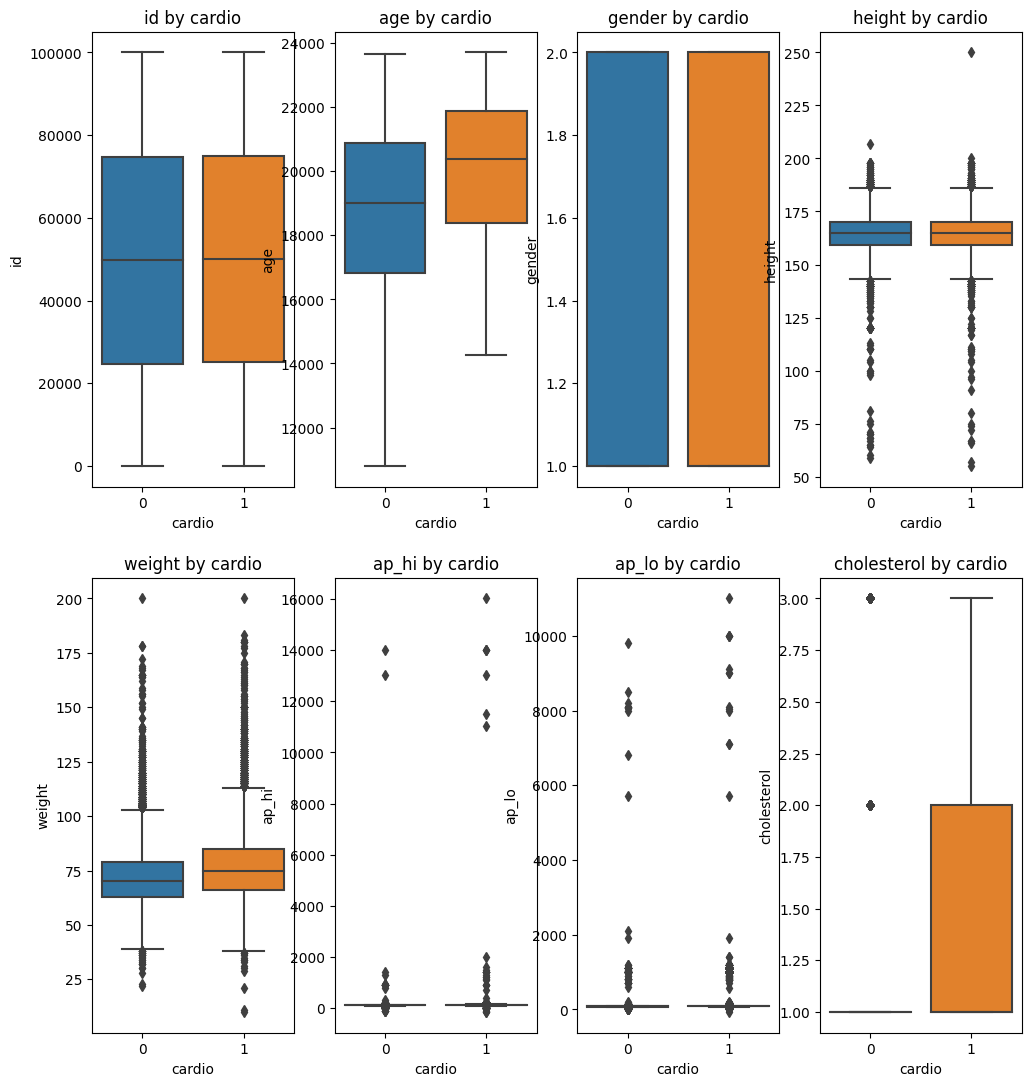

In [ ]:
# Step : Data Summary
print("Data Summary:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nData Statistics:")
print(data.describe())

# Step : Data Visualization and EDA
# Pairplot for visualizing relationships between features
sns.pairplot(data, hue='cardio', diag_kind='kde')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of the target variable 'cardio'
sns.countplot(data['cardio'])
plt.title('Distribution of cardio')
plt.show()

# Histograms of numerical features
data.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

# Boxplots for numerical features by cardio
numerical_features = data.drop('cardio', axis=1).columns
plt.figure(figsize=(12, 13))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='cardio', y=feature, data=data)
    plt.title(f'{feature} by cardio')
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

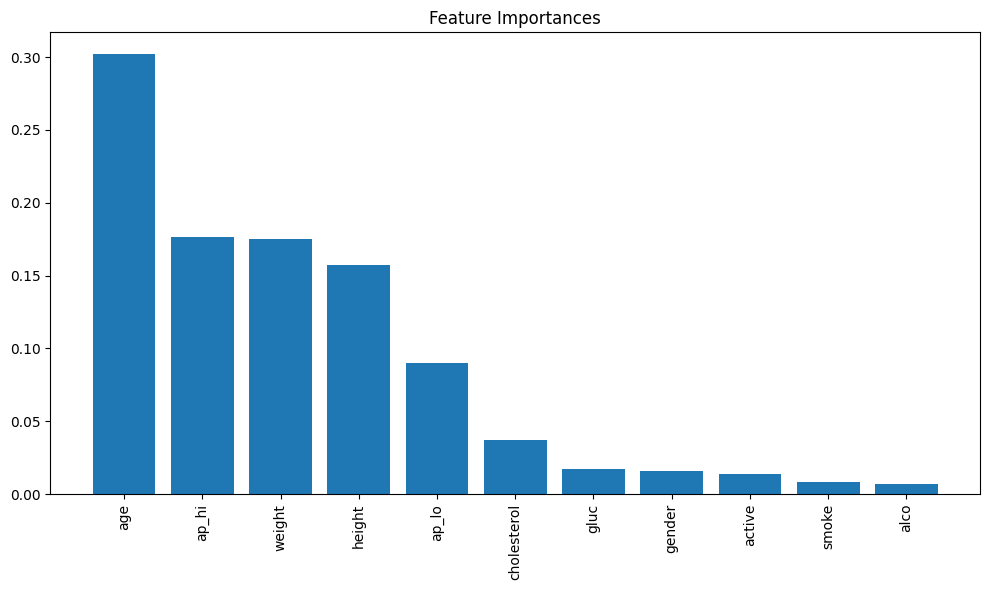

In [ ]:
importances = rf_classifier.feature_importances_
feature_names = X.columns


indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


Cross-Validation Scores: [0.71528571 0.72378571 0.71507143 0.715      0.71242857]
Mean Cross-Validation Score: 0.7163142857142857


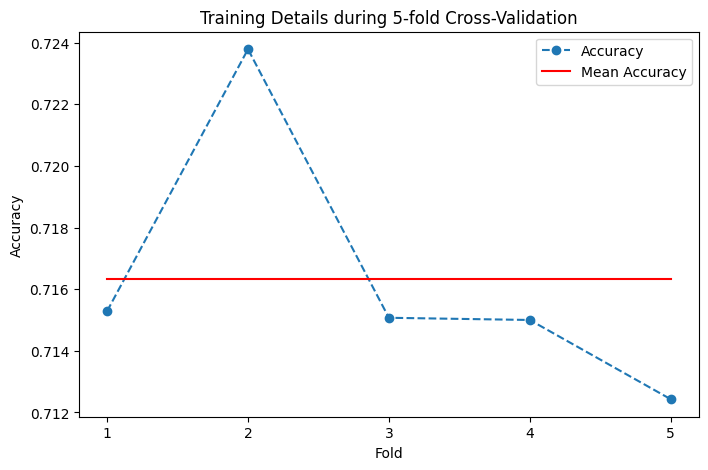

In [ ]:
rf_classifier = RandomForestClassifier()
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(rf_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-fold Cross-Validation of Random Forest')
plt.legend()
plt.show()

Accuracy: 0.7144285714285714
Precision: 0.7203216374269006
Recall: 0.7026525955504849
F1-score: 0.7113774184233325
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



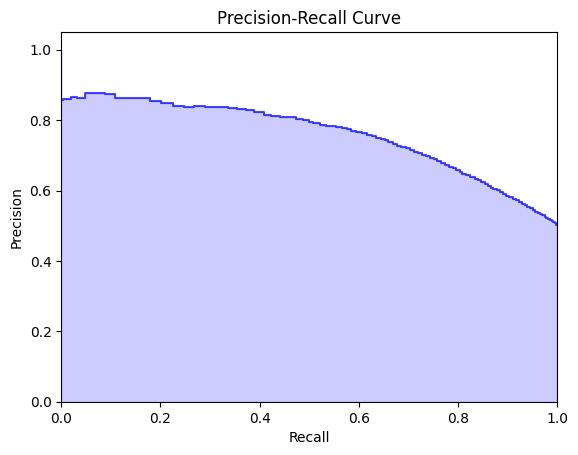

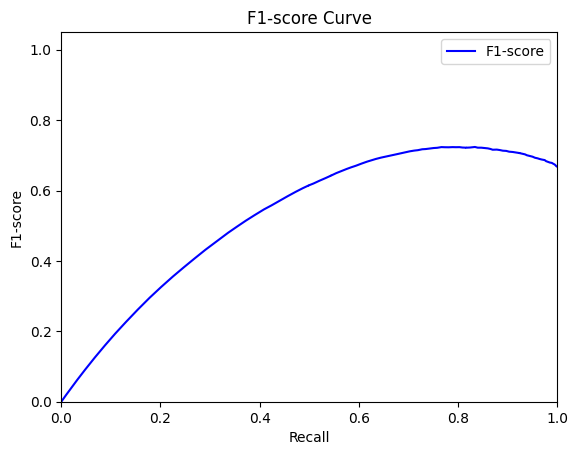

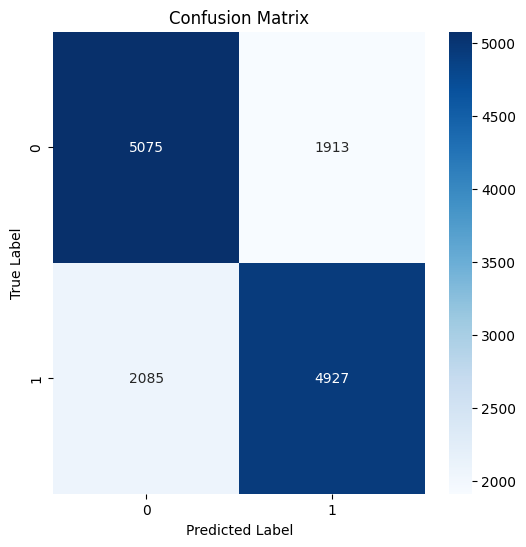

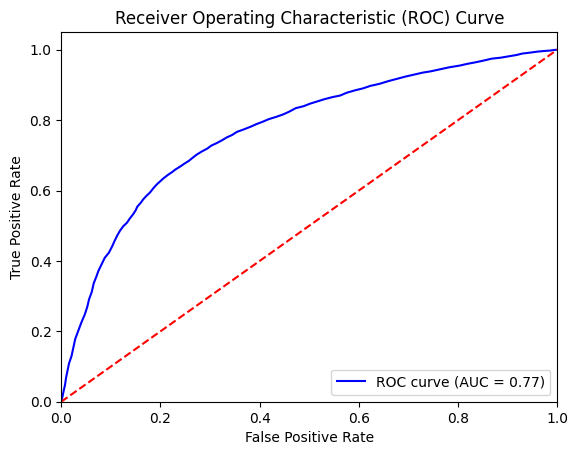

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    precision_recall_curve,
    auc,
    confusion_matrix,
    roc_curve,
)
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined X (features) and y (target) variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Decision Tree - Cross-Validation Scores: [0.62607143 0.64335714 0.63707143 0.62864286 0.6295    ]
Decision Tree - Mean Cross-Validation Score: 0.6329285714285715


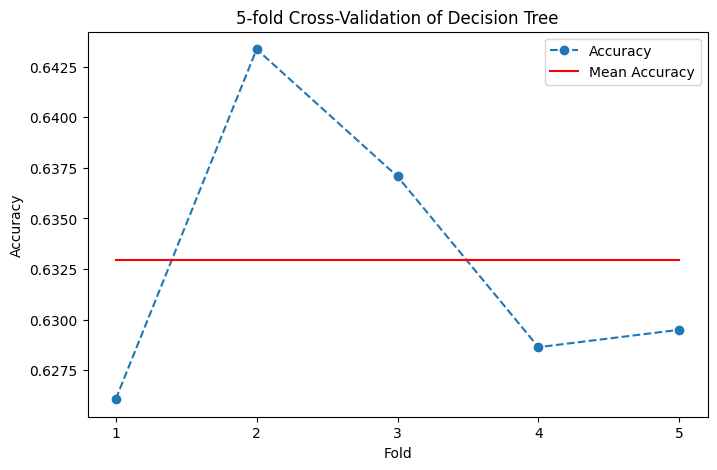

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined X (features) and y (target) variables

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform cross-validation
cv_scores_dt = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions_dt = cross_val_predict(dt_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score_dt = np.mean(cv_scores_dt)

print("Decision Tree - Cross-Validation Scores:", cv_scores_dt)
print("Decision Tree - Mean Cross-Validation Score:", mean_cv_score_dt)

# Plot training details for Decision Tree
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores_dt, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score_dt] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-fold Cross-Validation of Decision Tree')
plt.legend()
plt.show()


Accuracy: 0.6304285714285714
Precision: 0.6287836322869955
Recall: 0.6399030233884769
F1-score: 0.6342945999434549
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      6988
           1       0.63      0.64      0.63      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



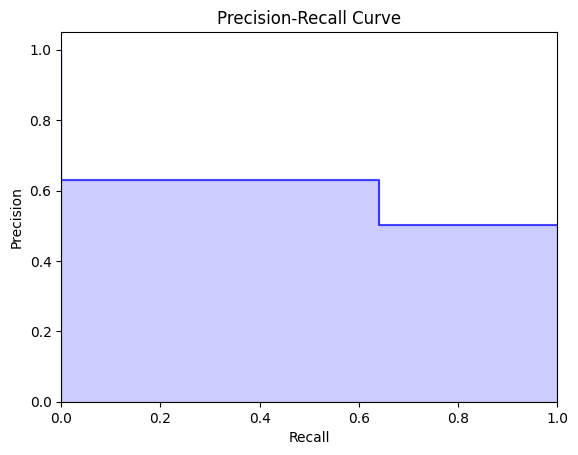

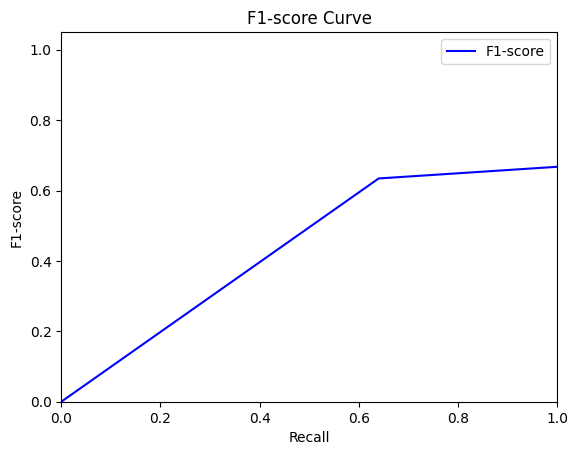

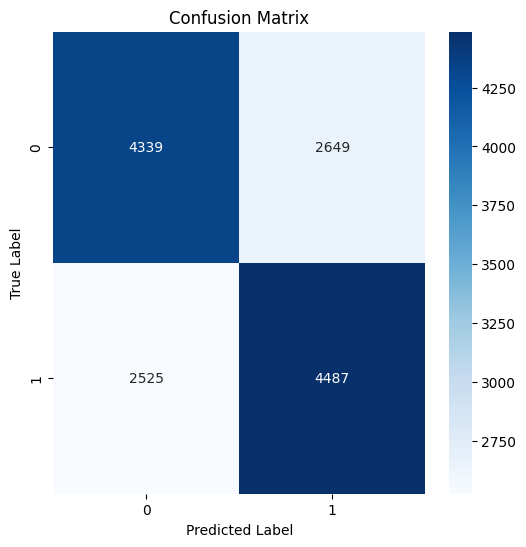

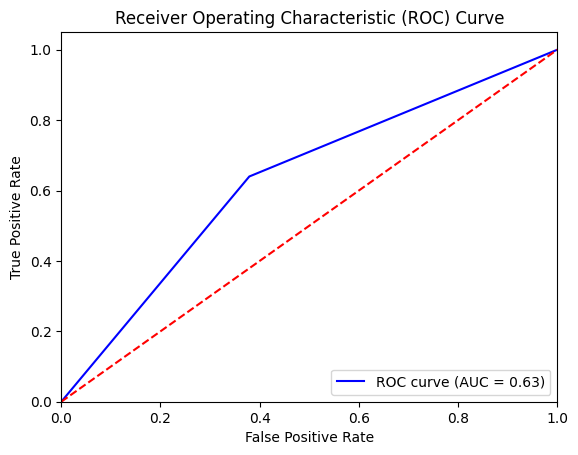

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    precision_recall_curve,
    auc,
    confusion_matrix,
    roc_curve,
)
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined X (features) and y (target) variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier instance
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = dt_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Naive Bayes - Cross-Validation Scores: [0.59607143 0.59435714 0.58692857 0.5925     0.59378571]
Naive Bayes - Mean Cross-Validation Score: 0.5927285714285714


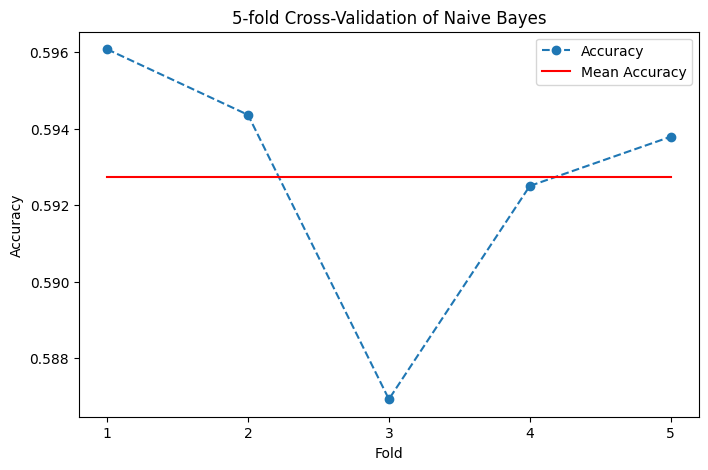

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined X (features) and y (target) variables

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions_nb = cross_val_predict(nb_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score_nb = np.mean(cv_scores_nb)

print("Naive Bayes - Cross-Validation Scores:", cv_scores_nb)
print("Naive Bayes - Mean Cross-Validation Score:", mean_cv_score_nb)

# Plot training details for Naive Bayes
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores_nb, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score_nb] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-fold Cross-Validation of Naive Bayes')
plt.legend()
plt.show()


Accuracy: 0.5932857142857143
Precision: 0.7105431309904153
Recall: 0.31717056474614946
F1-score: 0.43857227371327157
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.87      0.68      6988
           1       0.71      0.32      0.44      7012

    accuracy                           0.59     14000
   macro avg       0.64      0.59      0.56     14000
weighted avg       0.64      0.59      0.56     14000



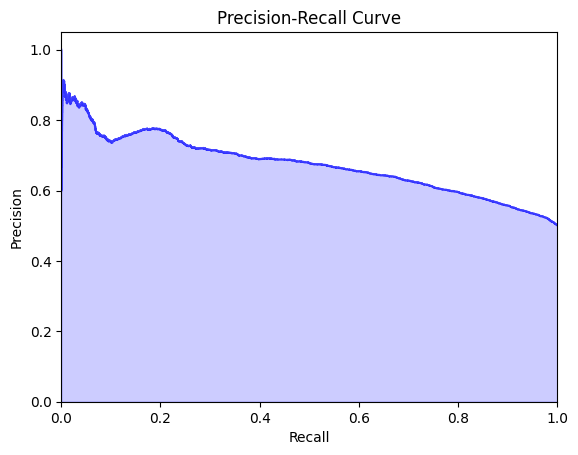

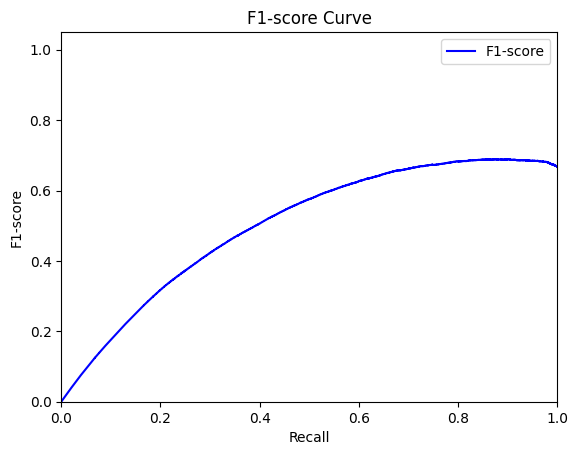

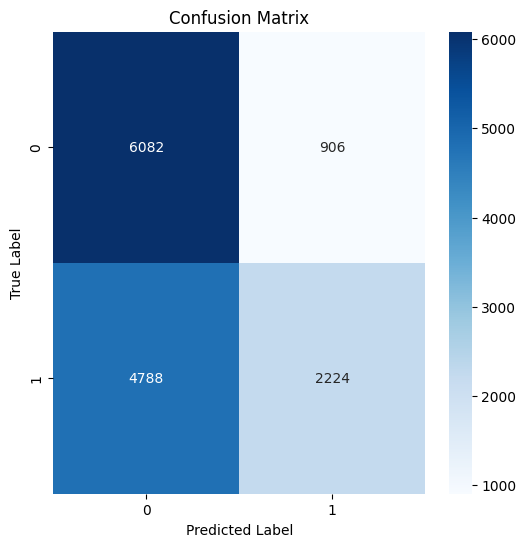

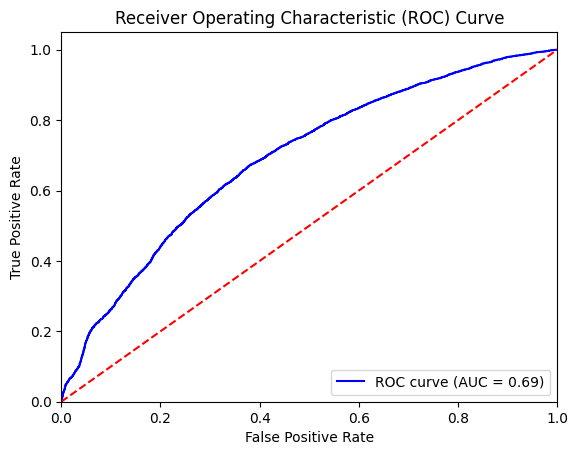

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    precision_recall_curve,
    auc,
    confusion_matrix,
    roc_curve,
)
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined X (features) and y (target) variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier instance
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = nb_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = nb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


KNN - Cross-Validation Scores: [0.68657143 0.69328571 0.68857143 0.69114286 0.68985714]
KNN - Mean Cross-Validation Score: 0.6898857142857143


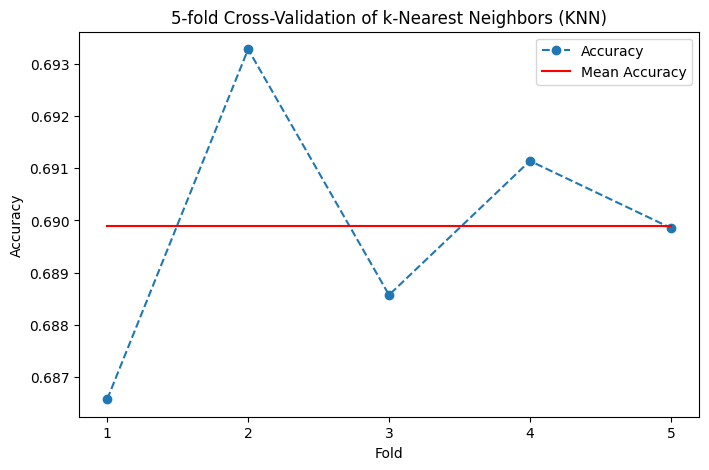

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined X (features) and y (target) variables

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform cross-validation
cv_scores_knn = cross_val_score(knn_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions_knn = cross_val_predict(knn_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score_knn = np.mean(cv_scores_knn)

print("KNN - Cross-Validation Scores:", cv_scores_knn)
print("KNN - Mean Cross-Validation Score:", mean_cv_score_knn)

# Plot training details for KNN
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores_knn, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score_knn] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-fold Cross-Validation of k-Nearest Neighbors (KNN)')
plt.legend()
plt.show()


Accuracy: 0.6876428571428571
Precision: 0.6962665476721701
Recall: 0.6675698802053622
F1-score: 0.6816163087004004
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      6988
           1       0.70      0.67      0.68      7012

    accuracy                           0.69     14000
   macro avg       0.69      0.69      0.69     14000
weighted avg       0.69      0.69      0.69     14000



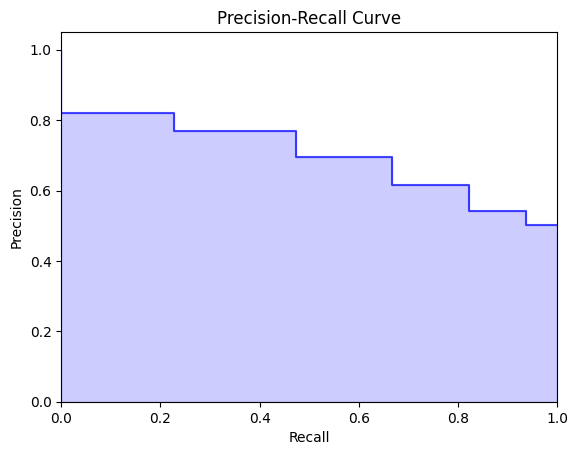

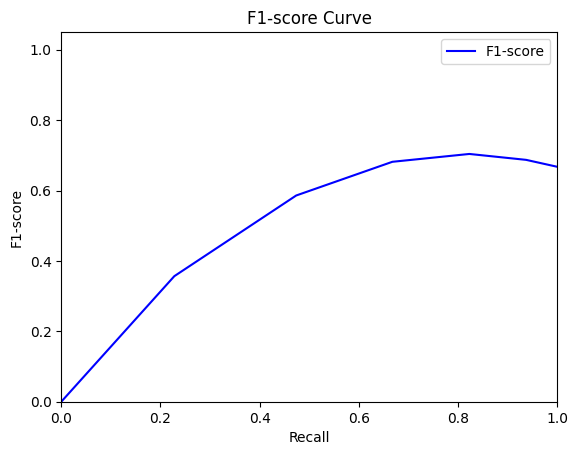

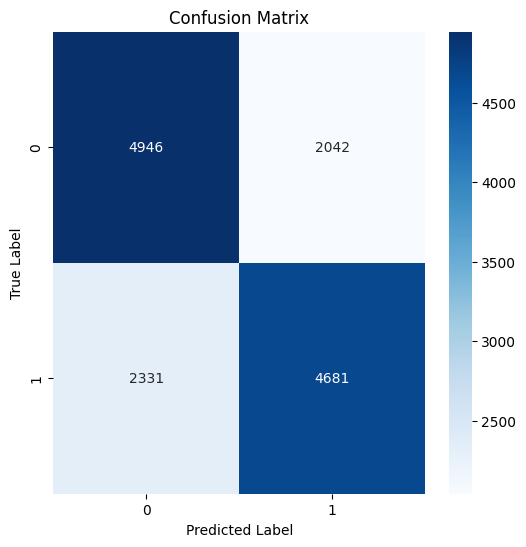

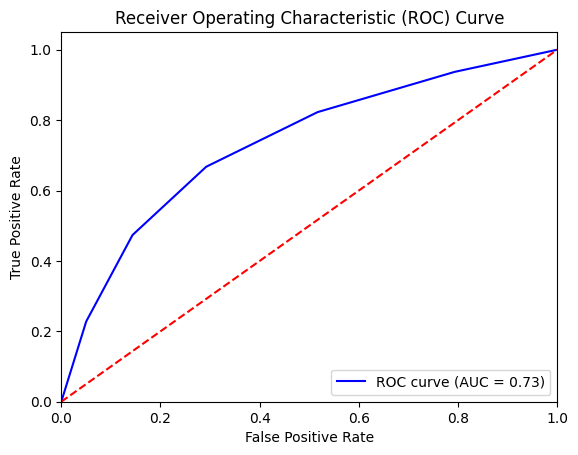

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    precision_recall_curve,
    auc,
    confusion_matrix,
    roc_curve,
)
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined X (features) and y (target) variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier instance
knn_classifier = KNeighborsClassifier()

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = knn_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = knn_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


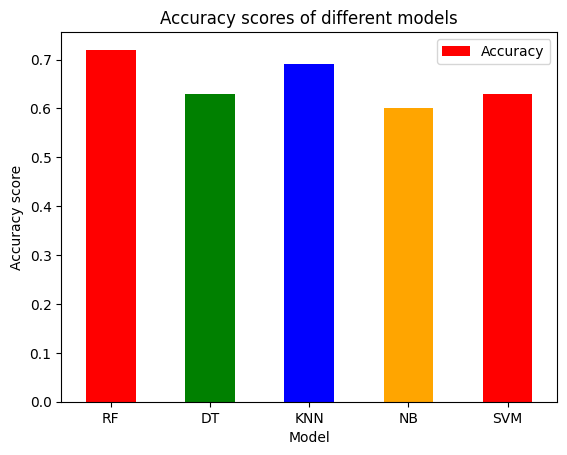

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

accuracy_scores = {
    'RF': 0.72,
    'DT': 0.63,
    'KNN': 0.69,
    'NB': 0.6,
    'SVM': 0.63
}
colors = ['red', 'green', 'blue', 'orange']

df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])
ax = df.plot.bar(x='Model', y='Accuracy', rot=0, color=colors)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy score')
ax.set_title('Accuracy scores of different models')
plt.show()


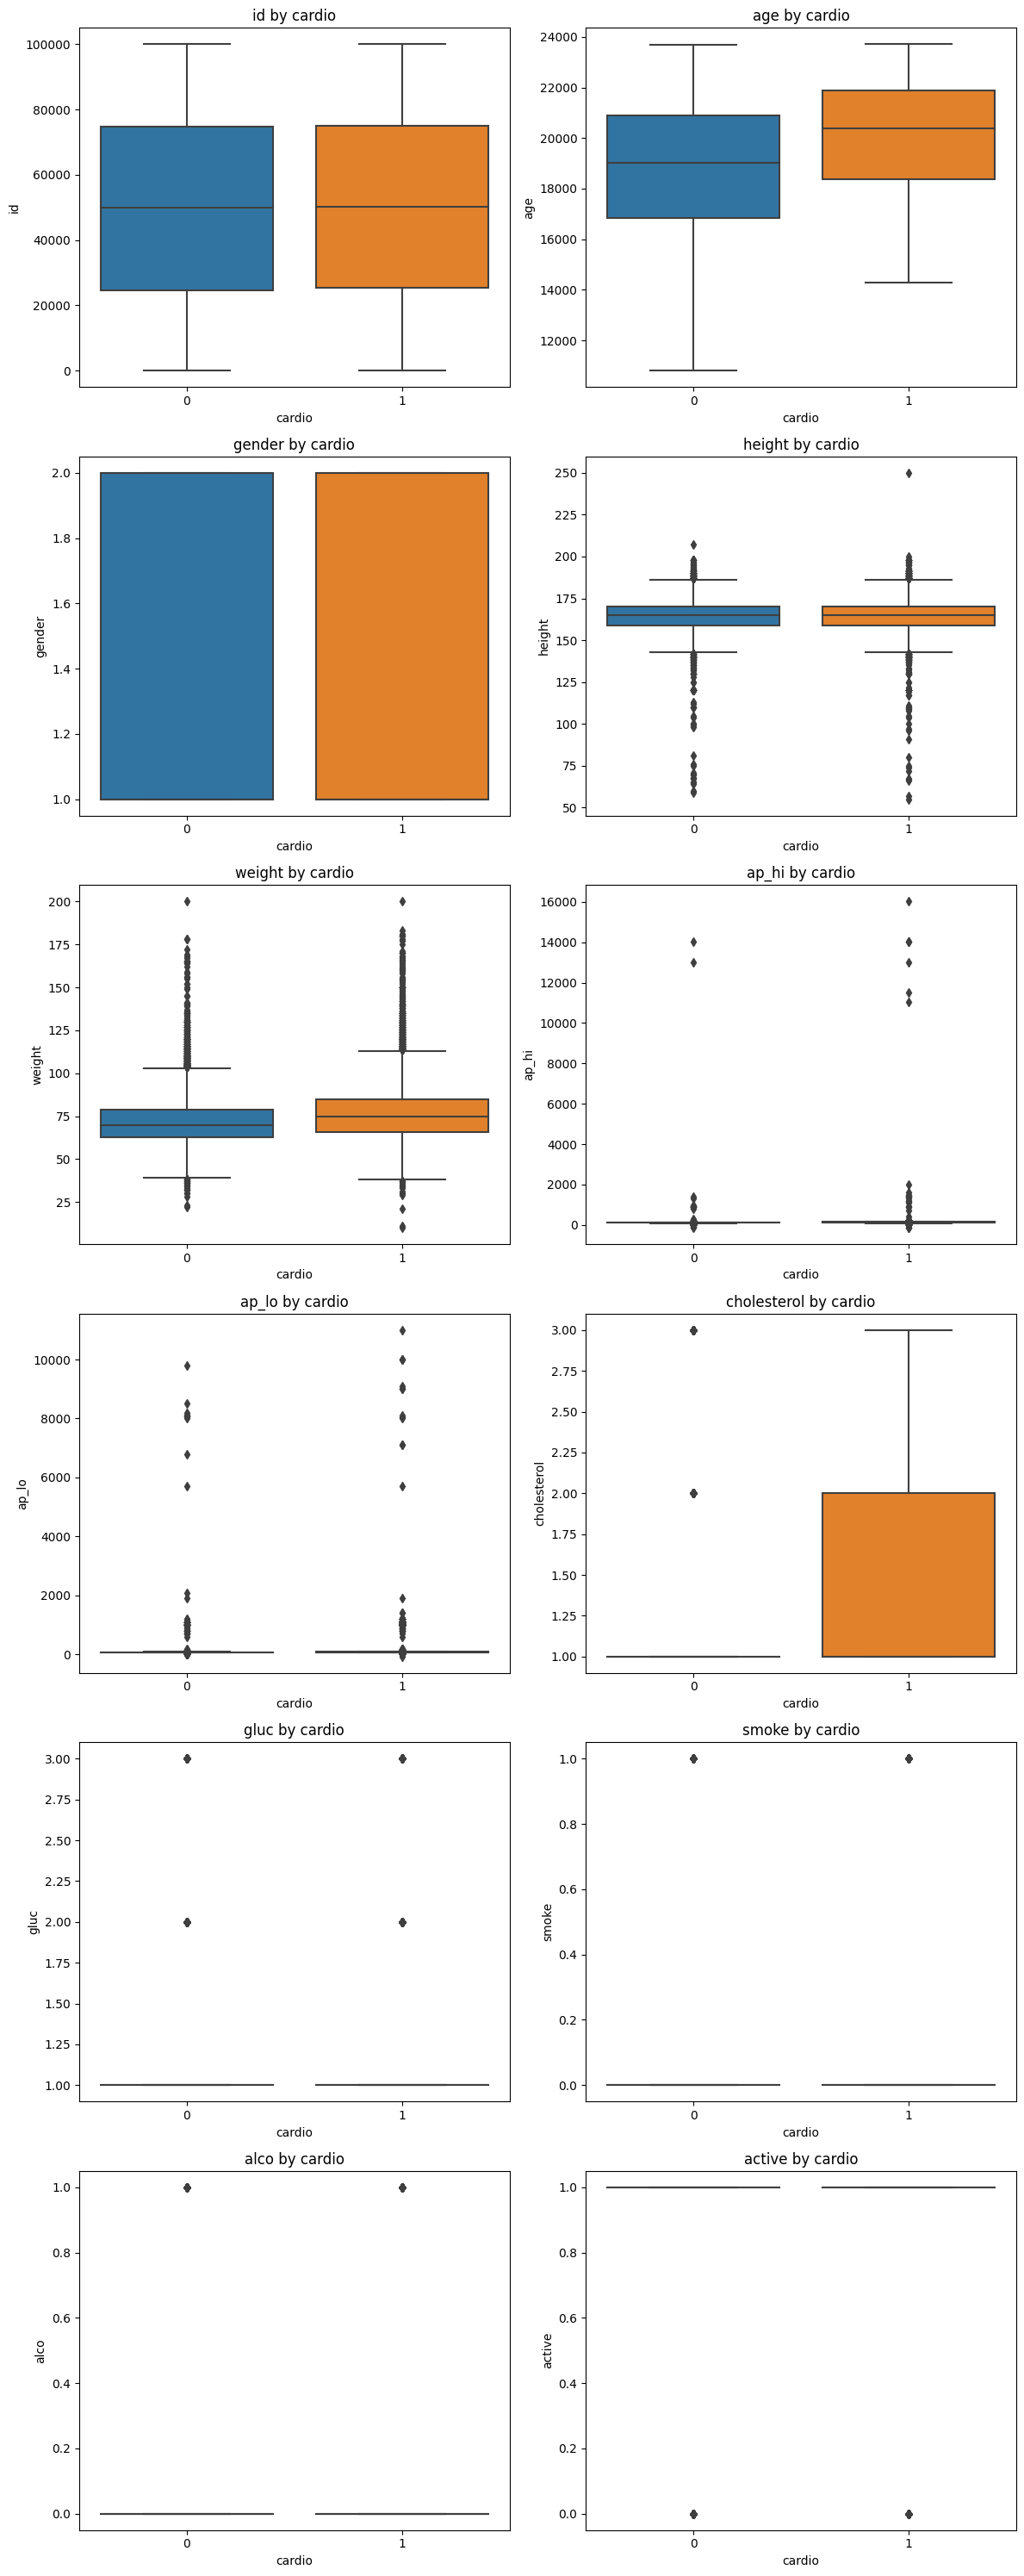

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... Previous code ...

# Boxplots for numerical features by cardio
numerical_features = data.drop('cardio', axis=1).columns
num_features = len(numerical_features)  # Get the number of numerical features
rows = (num_features + 1) // 2  # Calculate the number of subplot rows needed

plt.figure(figsize=(12, 5 * rows))  # Adjust the figure size based on the number of rows
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, 2, i)  # Use rows, 2 as the subplot layout
    sns.boxplot(x='cardio', y=feature, data=data)
    plt.title(f'{feature} by cardio')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np
import matplotlib.pyplot as plt



# Create an SVM classifier
svm_classifier = SVC()

# Perform cross-validation
cv_scores_svm = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions_svm = cross_val_predict(svm_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score_svm = np.mean(cv_scores_svm)

print("SVM - Cross-Validation Scores:", cv_scores_svm)
print("SVM - Mean Cross-Validation Score:", mean_cv_score_svm)

# Plot training details for SVM
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores_svm, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score_svm] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-fold Cross-Validation of Support Vector Machine (SVM)')
plt.legend()
plt.show()



TypeError: ignored

In [ ]:
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_prediction_dt = model_dt.predict(X_test)

# Calculate the accuracy score
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)

# Print the accuracy score
print("Accuracy: {}".format(score_dt))


Accuracy: 0.6351
